# Description

For this algorithm, we will use universities dataset and will try to cluster them in private and public groups. Please note that K-Means Clustering is an unsupervised algorithm which means the data that we get will be unlabeled and there will be no way of knowing what the labels represent.

## The Data

The data contains 777 observations on the following 18 variables.
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

In [1]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# read the dataset
df = pd.read_csv("./College_Data", index_col=0)

In [8]:
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Apps,777.0,3001.638353,3870.201484,81.0,776.0,1558.0,3624.0,48094.0
Accept,777.0,2018.804376,2451.113971,72.0,604.0,1110.0,2424.0,26330.0
Enroll,777.0,779.972973,929.176190,35.0,242.0,434.0,902.0,6392.0
Top10perc,777.0,27.558559,17.640364,1.0,15.0,23.0,35.0,96.0
Top25perc,777.0,55.796654,19.804778,9.0,41.0,54.0,69.0,100.0
F.Undergrad,777.0,3699.907336,4850.420531,139.0,992.0,1707.0,4005.0,31643.0
P.Undergrad,777.0,855.298584,1522.431887,1.0,95.0,353.0,967.0,21836.0
Outstate,777.0,10440.669241,4023.016484,2340.0,7320.0,9990.0,12925.0,21700.0
Room.Board,777.0,4357.526384,1096.696416,1780.0,3597.0,4200.0,5050.0,8124.0
Books,777.0,549.380952,165.105360,96.0,470.0,500.0,600.0,2340.0


### Exploratory Data Analysis

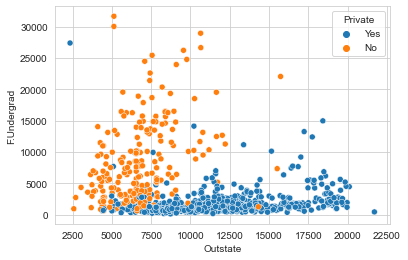

In [12]:
# Scatter plot of fulltime undergrad vs Outstate
sns.set_style("whitegrid")
sns.scatterplot(x="Outstate", y="F.Undergrad", data=df, hue="Private")
plt.show()

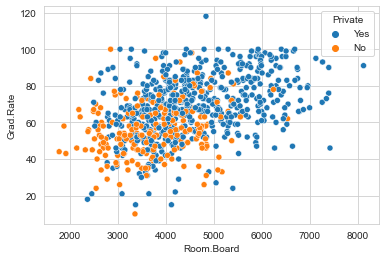

In [15]:
# Scatter plot of Room.Board vs Grad.Rate
# we want to see how many people graduate
# based on Room and Board costs
sns.scatterplot(x="Room.Board", y="Grad.Rate", data=df, hue="Private")
plt.show()

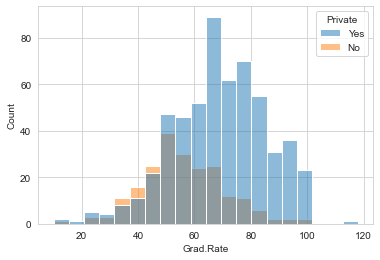

In [17]:
# Historgram of graduation rate, we want to see
# the average graduation rate although you can
# also get the same info by using the describe
# method on the pandas dataframe
sns.histplot(x="Grad.Rate", hue="Private", data=df)
plt.show()

Let's Remove the school with graduation rate higher than 100%

In [39]:
# Get the school with maximum graduation rate, this
# will return us the row that has this abnormally 
# high graduation rate, doesn't make sense
df[df["Grad.Rate"] == df["Grad.Rate"].max()]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [41]:
df.at["Cazenovia College", "Grad.Rate"] = 100

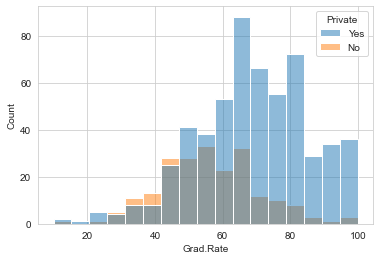

In [42]:
sns.histplot(x="Grad.Rate", hue="Private", data=df)
plt.show()

### K-Means Model

In [43]:
from sklearn.cluster import KMeans

In [44]:
KMC = KMeans(n_clusters=2).fit(df.drop("Private", axis=1))

In [45]:
print(KMC.cluster_centers_)

[[1.03631389e+04 6.55089815e+03 2.56972222e+03 4.14907407e+01
  7.02037037e+01 1.30619352e+04 2.46486111e+03 1.07191759e+04
  4.64347222e+03 5.95212963e+02 1.71420370e+03 8.63981481e+01
  9.13333333e+01 1.40277778e+01 2.00740741e+01 1.41705000e+04
  6.75925926e+01]
 [1.81323468e+03 1.28716592e+03 4.91044843e+02 2.53094170e+01
  5.34708520e+01 2.18854858e+03 5.95458894e+02 1.03957085e+04
  4.31136472e+03 5.41982063e+02 1.28033632e+03 7.04424514e+01
  7.78251121e+01 1.40997010e+01 2.31748879e+01 8.93204634e+03
  6.50926756e+01]]


### Evaluation

Since K-Means performs clustering on unlabeled data, we have no way of evaluating the model and even with the known labels of this dataset, we will leave it as it is and will not perform evaluation.